# Business Challenge: Cohort Analysis for Ironhack Payments (Project 1)

### Project Overview

 In this project, i will conduct a comprehensive cohort analysis based on data provided by IronHack Payments. The primary objective is to analyze user cohorts defined by the month in which their first cash advance was created. I will track the monthly evolution of key metrics for these cohorts, enabling IronHack Payments to gain valuable insights into user behavior and the performance of their financial services.

### Metrics to Analyze

I will calculate and analyze the following metrics for each cohort:

1. Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

2. Incident Rate: Determine the incident rate, explicitly focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

3. Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

4. New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

### Exploratory Data Analysis (EDA)

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the files
cash_request=pd.read_csv('project_dataset\extract - cash request - data analyst.csv')
fees=pd.read_csv('project_dataset\extract - fees - data analyst - .csv')

#### EDA cash_request

In [3]:
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [5]:
# Checking the missing values
missing_values = pd.isnull(cash_request)
missing_counts = missing_values.sum()
print(missing_counts)

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64


In [6]:
# Checking columns that only have unique values
[col for col in cash_request.columns if cash_request[col].is_unique]

['id', 'created_at', 'updated_at']

In [7]:
values_column = cash_request['send_at'].unique()
print(values_column)

[nan '2020-10-23 15:21:26.878525+00' '2020-07-28 21:33:12.430087+00' ...
 '2020-10-20 07:58:14.171553+00' '2020-10-10 05:41:23.368363+00'
 '2020-10-08 14:17:04.526139+00']


In [8]:
na_send = cash_request[cash_request['send_at'].isna()]
status_na_counts = na_send['status'].value_counts()
print(status_na_counts)

cash_request['status'].value_counts()

status
money_back               4385
rejected                 2706
direct_debit_rejected     205
canceled                   15
active                     15
direct_debit_sent           3
Name: count, dtype: int64


status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

Taking into account the requested metrics, we can eliminate columns with data that will not be relevant to the analysis.

In [9]:
cash_df = cash_request.drop(["updated_at", "moderated_at", "cash_request_received_date", "reimbursement_date",  "created_at",  "money_back_date", "transfer_type",'reco_creation','reco_last_update'], axis=1)
print(cash_df.shape)
cash_df.head()


(23970, 7)


,id,amount,status,user_id,deleted_account_id,send_at,recovery_status
0,5,100.0,rejected,804.0,NaN,NaN,NaN
1,70,100.0,rejected,231.0,NaN,NaN,NaN
2,7,100.0,rejected,191.0,NaN,NaN,NaN
3,10,99.0,rejected,761.0,NaN,NaN,NaN
4,1594,100.0,rejected,7686.0,NaN,NaN,NaN


It is important to fill the values that are with NaN

In [10]:
# The NaN in recovery_status, means that no incidents happened
cash_df['recovery_status'] = cash_df['recovery_status'].fillna('No incident')

In [11]:
# Checking again the missing values
missing_values = pd.isnull(cash_df)
missing_counts = missing_values.sum()
print(missing_counts)

id                        0
amount                    0
status                    0
user_id                2103
deleted_account_id    21866
send_at                7329
recovery_status           0
dtype: int64


The user_id column with NaN values, it's because the account was deleted, and its ID is stored in the deleted_account_id column. So we can fill in the missing data for user_id with the data from deleted_account_id

In [12]:
cash_df['all_user_id'] = cash_df['user_id'].fillna(cash_df['deleted_account_id'])
cash_df.drop(columns=['user_id'], inplace=True)

In [13]:
# Checking again the missing values
missing_values = pd.isnull(cash_df)
missing_counts = missing_values.sum()
print(missing_counts)

id                        0
amount                    0
status                    0
deleted_account_id    21866
send_at                7329
recovery_status           0
all_user_id               0
dtype: int64


Since we already have all the users ID stored in all_user_id column, we can use the deleted_account_id just to show whether the user was deleted or not, being True for deleted and false for not deleted

In [14]:
cash_df['deleted_account_id'] = cash_df['deleted_account_id'].notna()

In [15]:
# Checking again the missing values
missing_values = pd.isnull(cash_df)
missing_counts = missing_values.sum()
print(missing_counts)

id                       0
amount                   0
status                   0
deleted_account_id       0
send_at               7329
recovery_status          0
all_user_id              0
dtype: int64


We need to calculate the cohorts considering the first date were the user received the cash in advanced, so for that we are considering the column send_at, so we can exclude de rows with NaN for send_at

In [16]:
cash_df = cash_df.dropna(subset=['send_at'])

In [17]:
# Checking again the missing values
missing_values = pd.isnull(cash_df)
missing_counts = missing_values.sum()
print(missing_counts)

id                    0
amount                0
status                0
deleted_account_id    0
send_at               0
recovery_status       0
all_user_id           0
dtype: int64


Now all the missing values were replaced

In [18]:
cash_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16641 entries, 48 to 23969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  16641 non-null  int64  
 1   amount              16641 non-null  float64
 2   status              16641 non-null  object 
 3   deleted_account_id  16641 non-null  bool   
 4   send_at             16641 non-null  object 
 5   recovery_status     16641 non-null  object 
 6   all_user_id         16641 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 926.3+ KB


The columns all_user_id and id are used to identify something, so makes more sense if they are recognized as categorical data

In [19]:
cash_df['all_user_id'] = cash_df['all_user_id'].astype('category')
cash_df['id'] = cash_df['id'].astype('category')
cash_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16641 entries, 48 to 23969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  16641 non-null  category
 1   amount              16641 non-null  float64 
 2   status              16641 non-null  object  
 3   deleted_account_id  16641 non-null  bool    
 4   send_at             16641 non-null  object  
 5   recovery_status     16641 non-null  object  
 6   all_user_id         16641 non-null  category
dtypes: bool(1), category(2), float64(1), object(3)
memory usage: 1.7+ MB


Now we need to create the cohorts considering the date of the first request, which is represented in 'send_at'

In [20]:
# It converts the 'send_at' column in the DataFrame cash_df into datetime format
cash_df['send_at'] = pd.to_datetime(cash_df['send_at'], format='mixed')

In [21]:
# For creating the new column 'cohort':
# for each user group, we take the minimum 'send_at' date
# we convert it to a monthly period
cash_df['cohort'] = cash_df.groupby('all_user_id')['send_at'].transform('min').dt.to_period('M')

C:\Users\pieri\AppData\Local\Temp\ipykernel_11952\4269094928.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cash_df['cohort'] = cash_df.groupby('all_user_id')['send_at'].transform('min').dt.to_period('M')
C:\Users\pieri\AppData\Local\Temp\ipykernel_11952\4269094928.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_df['cohort'] = cash_df.groupby('all_user_id')['send_at'].transform('min').dt.to_period('M')


In [22]:
cash_df.head()

,id,amount,status,deleted_account_id,send_at,recovery_status,all_user_id,cohort
48,23534,25.0,money_back,False,2020-10-23 15:21:26.878525+00:00,No incident,21465.0,2020-09
55,9323,50.0,rejected,False,2020-07-28 21:33:12.430087+00:00,No incident,23318.0,2020-07
60,18701,100.0,rejected,False,2020-10-08 11:41:07.170136+00:00,No incident,57285.0,2020-10
62,16121,50.0,rejected,False,2020-09-21 23:05:32.558375+00:00,No incident,38075.0,2020-09
135,18459,100.0,rejected,False,2020-10-06 18:36:25.849957+00:00,No incident,55584.0,2020-10


#### EDA fees

In [23]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [24]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [25]:
# Checking missing values
missing_values = pd.isnull(fees)
missing_counts = missing_values.sum()
print(missing_counts)

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64


In [26]:
# Checking the rows which cash_request_id is NaN
NaN_cash_id = fees[fees['cash_request_id'].isna()]
display(NaN_cash_id)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [27]:
# This rows does not seem relevant for our metrics since they were cancelled, so we can delete them
df_fees = fees.dropna(subset=['cash_request_id'])

Considering only the data that is relevant for our metrics, we can delete some columns, making the data frame more clean

In [28]:
fees_df = df_fees.drop(['updated_at','from_date','to_date','charge_moment','reason','created_at'], axis=1)
print(fees_df.shape)
fees_df.head()


(21057, 7)


,id,cash_request_id,type,status,category,total_amount,paid_at
0,6537,14941.0,instant_payment,rejected,NaN,5.0,2020-12-17 14:50:07.47011+00
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,2020-12-08 17:13:10.45908+00
2,16296,23371.0,instant_payment,accepted,NaN,5.0,2020-11-04 19:34:37.43291+00
3,20775,26772.0,instant_payment,accepted,NaN,5.0,2020-11-19 05:09:22.500223+00
4,11242,19350.0,instant_payment,accepted,NaN,5.0,2020-11-02 14:45:20.355598+00


Both data frames have the same column for id of cash request. We played with this columns to check which values are in both data frames, how many duplicates...

In [29]:
ids_cash = set(cash_df['id'])
print('The number of values for id in cash request df is:',len(ids_cash))

# Checking how many different values appears only in fees df
different_in_fees= fees_df[~fees_df['cash_request_id'].isin(ids_cash)]

# Checking only the unique id
ids_uniq = different_in_fees['cash_request_id'].unique()

# How many rows are different in fees df
different_rows = len(different_in_fees)

# Results
print("\n Different IDs (only in fees df, not in cash df):")
print(len(ids_uniq))

print("\nTotal numbers of rows in fees df with different IDs:")
print(different_rows)

# Checking how many equal values appears in fees df
equal_in_fees= fees_df[fees_df['cash_request_id'].isin(ids_cash)]

# Checking the unique equal values
ids_equal_uniq = equal_in_fees['cash_request_id'].unique()

# Results
print('\nTotal numbers of rows in fees df with same IDs ')
print(len(equal_in_fees))
print('\nSame IDs in both:')
print(len(ids_equal_uniq))

The number of values for id in cash request df is: 16641

 Different IDs (only in fees df, not in cash df):
1400

Total numbers of rows in fees df with different IDs:
3487

Total numbers of rows in fees df with same IDs 
17570

Same IDs in both:
11533


Considering that we are working with cohorts, and using the values in send_at column in cash_df to build that cohorts, we decided to delete the 3487 different Ids in fees df that are not in cash df

In [30]:
fees_df_filtered = fees_df[fees_df['cash_request_id'].isin(cash_df['id'])]

In [31]:
fees_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 0 to 21060
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               17570 non-null  int64  
 1   cash_request_id  17570 non-null  float64
 2   type             17570 non-null  object 
 3   status           17570 non-null  object 
 4   category         1085 non-null   object 
 5   total_amount     17570 non-null  float64
 6   paid_at          13939 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


Now we can merge this two data frames, to make easier we rename the 'id' column in cash df

In [32]:
cash_df = cash_df.rename(columns={'id': 'cash_request_id'})

Now we can merge the two data frames using the column 'cash_request_id'. We want to keep all the values for this id that exist in cash df, so we used the 'left' method. Like this we have all the values for 'cash_request_id' in cash df, even they are not present in feed df.

In [33]:
merged_df = pd.merge(cash_df, fees_df_filtered, how='left', on='cash_request_id')



In [34]:
merged_df.head()

,cash_request_id,amount,status_x,deleted_account_id,send_at,recovery_status,all_user_id,cohort,id,type,status_y,category,total_amount,paid_at
0,23534,25.0,money_back,False,2020-10-23 15:21:26.878525+00:00,No incident,21465.0,2020-09,16460.0,instant_payment,accepted,NaN,5.0,2020-11-06 07:16:22.014422+00
1,9323,50.0,rejected,False,2020-07-28 21:33:12.430087+00:00,No incident,23318.0,2020-07,NaN,NaN,NaN,NaN,NaN,NaN
2,18701,100.0,rejected,False,2020-10-08 11:41:07.170136+00:00,No incident,57285.0,2020-10,NaN,NaN,NaN,NaN,NaN,NaN
3,16121,50.0,rejected,False,2020-09-21 23:05:32.558375+00:00,No incident,38075.0,2020-09,NaN,NaN,NaN,NaN,NaN,NaN
4,18459,100.0,rejected,False,2020-10-06 18:36:25.849957+00:00,No incident,55584.0,2020-10,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22678 entries, 0 to 22677
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   cash_request_id     22678 non-null  int64              
 1   amount              22678 non-null  float64            
 2   status_x            22678 non-null  object             
 3   deleted_account_id  22678 non-null  bool               
 4   send_at             22678 non-null  datetime64[ns, UTC]
 5   recovery_status     22678 non-null  object             
 6   all_user_id         22678 non-null  category           
 7   cohort              22678 non-null  period[M]          
 8   id                  17570 non-null  float64            
 9   type                17570 non-null  object             
 10  status_y            17570 non-null  object             
 11  category            1085 non-null   object             
 12  total_amount        17570 non-nu

Now we can see that the number of rows is the same as number of Ids that were just in cash df + all the rows in fees df

Now we can work with this one merged data frame and calculate our metrics

In [36]:
# Checking missing values
missing_values = pd.isnull(merged_df)
missing_counts = missing_values.sum()
print(missing_counts)

cash_request_id           0
amount                    0
status_x                  0
deleted_account_id        0
send_at                   0
recovery_status           0
all_user_id               0
cohort                    0
id                     5108
type                   5108
status_y               5108
category              21593
total_amount           5108
paid_at                8739
dtype: int64


The columns id,type,status_y and total_amount are just for the cash_request_id values that generated a fee, so we can replace this NaN values with 'No fee'

In [37]:
merged_df[['id' , 'type' , 'status_y' , 'total_amount']] = merged_df[[ 'id' ,'type' , 'status_y' , 'total_amount']].fillna('No fee')

In [38]:
# Checking again missing values
missing_values = pd.isnull(merged_df)
missing_counts = missing_values.sum()
print(missing_counts)

cash_request_id           0
amount                    0
status_x                  0
deleted_account_id        0
send_at                   0
recovery_status           0
all_user_id               0
cohort                    0
id                        0
type                      0
status_y                  0
category              21593
total_amount              0
paid_at                8739
dtype: int64


The category column describes the reason of the incident fee, so the rows with NaN values indicates that didnt happen an incident fee. And the paid_at NaN is because it was not paid

In [39]:
merged_df['category'] = merged_df['category'].fillna('No incident fee')
merged_df['paid_at'] = merged_df['paid_at'].fillna('Not paid')


In [40]:
# Checking again missing values
missing_values = pd.isnull(merged_df)
missing_counts = missing_values.sum()
print(missing_counts)

cash_request_id       0
amount                0
status_x              0
deleted_account_id    0
send_at               0
recovery_status       0
all_user_id           0
cohort                0
id                    0
type                  0
status_y              0
category              0
total_amount          0
paid_at               0
dtype: int64


Now that we dont have NaN values in our data frame, we can start calculating the metrics

In [41]:
merged_df.head()

,cash_request_id,amount,status_x,deleted_account_id,send_at,recovery_status,all_user_id,cohort,id,type,status_y,category,total_amount,paid_at
0,23534,25.0,money_back,False,2020-10-23 15:21:26.878525+00:00,No incident,21465.0,2020-09,16460.0,instant_payment,accepted,No incident fee,5.0,2020-11-06 07:16:22.014422+00
1,9323,50.0,rejected,False,2020-07-28 21:33:12.430087+00:00,No incident,23318.0,2020-07,No fee,No fee,No fee,No incident fee,No fee,Not paid
2,18701,100.0,rejected,False,2020-10-08 11:41:07.170136+00:00,No incident,57285.0,2020-10,No fee,No fee,No fee,No incident fee,No fee,Not paid
3,16121,50.0,rejected,False,2020-09-21 23:05:32.558375+00:00,No incident,38075.0,2020-09,No fee,No fee,No fee,No incident fee,No fee,Not paid
4,18459,100.0,rejected,False,2020-10-06 18:36:25.849957+00:00,No incident,55584.0,2020-10,No fee,No fee,No fee,No incident fee,No fee,Not paid


## 1st metric

Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
So we want to see for each cohort how many times they use the services during the months. For that we need to look the columns for cohort, send_at(to check other dates that a user use the service again).

For this metric the data from fees df is not relevant for me,that means we need to considerate only the unique values for the column cash_request_id

In [42]:
# First we create a subset only with the columns that are relevant for this metric
subset_merged_df = merged_df[['cash_request_id', 'send_at','cohort']]
# Now we delete the duplicates
subset_merged_df = subset_merged_df.drop_duplicates()
subset_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16641 entries, 0 to 22676
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   cash_request_id  16641 non-null  int64              
 1   send_at          16641 non-null  datetime64[ns, UTC]
 2   cohort           16641 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), int64(1), period[M](1)
memory usage: 520.0 KB


In [43]:
# It converts the 'send_at' column in month period
subset_merged_df['send_at'] = subset_merged_df['send_at'].dt.to_period('M')
subset_merged_df.head()

C:\Users\pieri\AppData\Local\Temp\ipykernel_11952\2120728386.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset_merged_df['send_at'] = subset_merged_df['send_at'].dt.to_period('M')


,cash_request_id,send_at,cohort
0,23534,2020-10,2020-09
1,9323,2020-07,2020-07
2,18701,2020-10,2020-10
3,16121,2020-09,2020-09
4,18459,2020-10,2020-10


In [44]:
subset_merged_df['cohort'].unique()
subset_merged_df['send_at'].unique()

<PeriodArray>
['2020-10', '2020-07', '2020-09', '2020-08', '2020-11']
Length: 5, dtype: period[M]

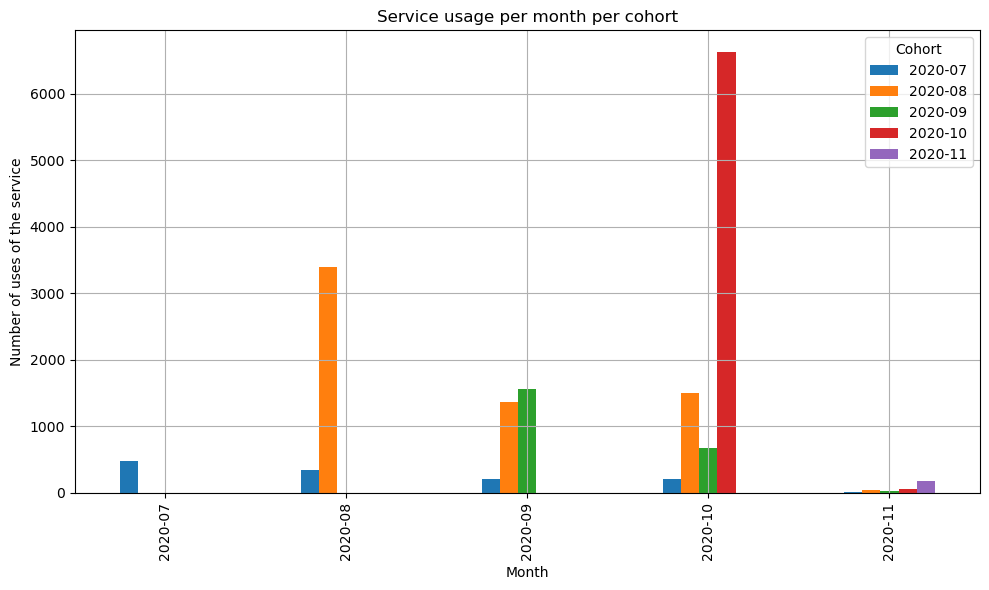

In [45]:
monthly_usage = subset_merged_df.groupby(['cohort', 'send_at']).size().unstack(fill_value=0)
all_months = ['2020-07', '2020-08', '2020-09', '2020-10', '2020-11']
monthly_usage = monthly_usage.reindex(columns=all_months, fill_value=0)

# Plot
monthly_usage.T.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Service usage per month per cohort')
plt.xlabel('Month')
plt.ylabel('Number of uses of the service')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()

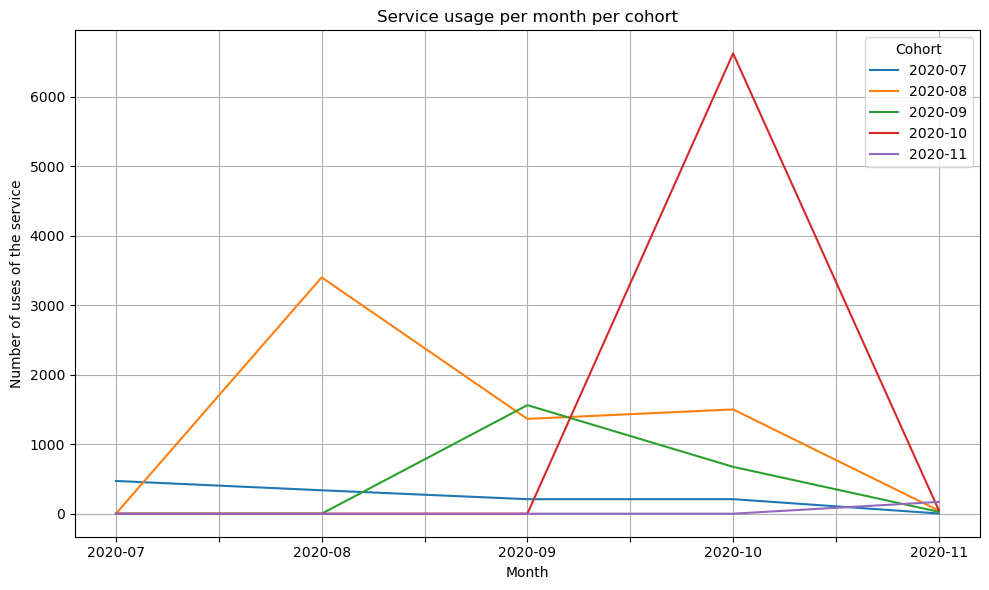

In [46]:

monthly_usage.T.plot(kind='line', stacked=False, figsize=(10, 6))
plt.title('Service usage per month per cohort')
plt.xlabel('Month')
plt.ylabel('Number of uses of the service')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()

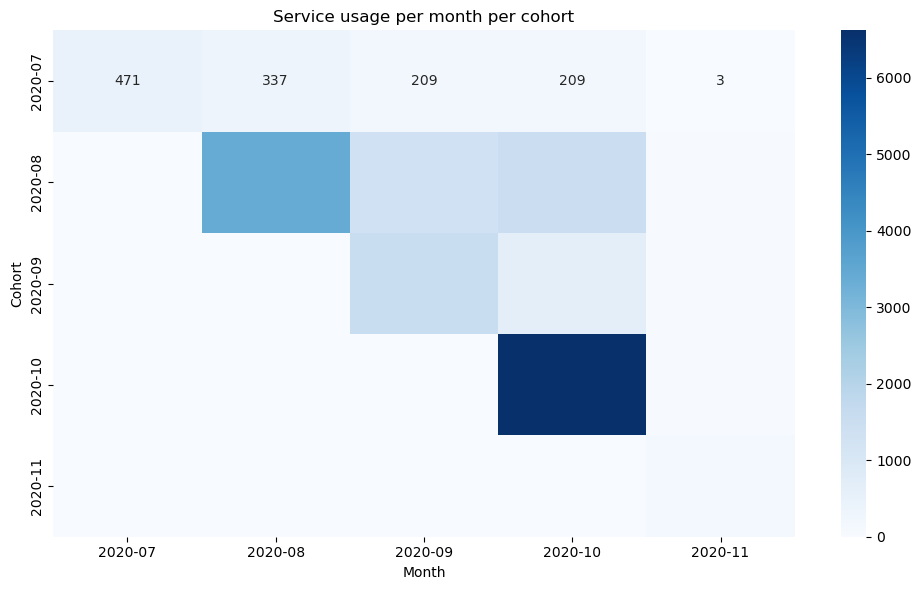

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_usage, annot=True, fmt='g', cmap='Blues')  # ou 'YlGnBu', 'coolwarm', etc.
plt.title('Service usage per month per cohort')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.tight_layout()
plt.show()

Insights:

A drop in the number of users within each cohort over time

Most users start using the cohort in October

Significant drop in users in November

## 2st metric

Incident Rate: Determine the incident rate, explicitly focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts

For this metric the important columns are the ones which contains information about incidents, so we created a subset only with this columns

In [48]:
subset_merged_2_df = merged_df[['cash_request_id','cohort','recovery_status']]
subset_merged_2_df.head()

,cash_request_id,cohort,recovery_status
0,23534,2020-09,No incident
1,9323,2020-07,No incident
2,18701,2020-10,No incident
3,16121,2020-09,No incident
4,18459,2020-10,No incident


In [49]:
subset_merged_2_df = subset_merged_2_df.drop_duplicates()

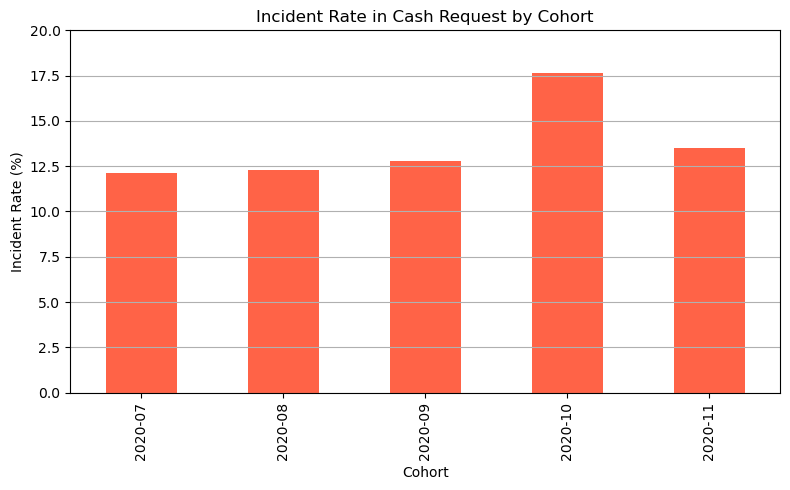

In [50]:
# Creating a new column that will return true if you had an incident
subset_merged_2_df['has_incident_cash'] = subset_merged_2_df['recovery_status'].apply(lambda x: x != 'No incident')

# Counting all the incidents and all the rows per cohort
incident_counts = subset_merged_2_df.groupby('cohort')['has_incident_cash'].sum()
total_counts = subset_merged_2_df.groupby('cohort')['has_incident_cash'].count()

# Calculating incident
incident_rate_cash = (incident_counts / total_counts) * 100

# Plot
incident_rate_cash.plot(kind='bar', color='tomato', figsize=(8, 5))
plt.title('Incident Rate in Cash Request by Cohort')
plt.ylabel('Incident Rate (%)')
plt.xlabel('Cohort')
plt.ylim(0, 20) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Insights:
Higher number of incident rates in October compared to other cohorts. 

Interpretation: 
The number of users in October were significantly higher than other cohorts, resulting in higher incident rates in CR. 

## 3st metric

Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [51]:
subset_merged_3_df = merged_df[['cohort','total_amount','status_y','paid_at']]
subset_merged_3_df.head()

,cohort,total_amount,status_y,paid_at
0,2020-09,5.0,accepted,2020-11-06 07:16:22.014422+00
1,2020-07,No fee,No fee,Not paid
2,2020-10,No fee,No fee,Not paid
3,2020-09,No fee,No fee,Not paid
4,2020-10,No fee,No fee,Not paid


First we will check only the amount for fees that was accepted

In [52]:
count = subset_merged_3_df['status_y'].value_counts()

print(count)

status_y
accepted     13137
No fee        5108
cancelled     3445
rejected       911
confirmed       77
Name: count, dtype: int64


For the status_y != accepted, we don't need to considerate de total_amount of fee to calculate the revenue, so i will delete these rows.

In [53]:
subset_merged_3_df = subset_merged_3_df[subset_merged_3_df['status_y'] == 'accepted']
subset_merged_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13137 entries, 0 to 22677
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   cohort        13137 non-null  period[M]
 1   total_amount  13137 non-null  object   
 2   status_y      13137 non-null  object   
 3   paid_at       13137 non-null  object   
dtypes: object(3), period[M](1)
memory usage: 513.2+ KB


In [54]:
subset_merged_3_df.head()

,cohort,total_amount,status_y,paid_at
0,2020-09,5.0,accepted,2020-11-06 07:16:22.014422+00
5,2020-10,5.0,accepted,2020-10-17 05:30:46.780335+00
6,2020-10,5.0,accepted,2020-10-31 18:58:22.280263+00
7,2020-10,5.0,accepted,2020-11-06 19:27:38.941414+00
10,2020-08,5.0,accepted,2020-11-06 20:35:03.804527+00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


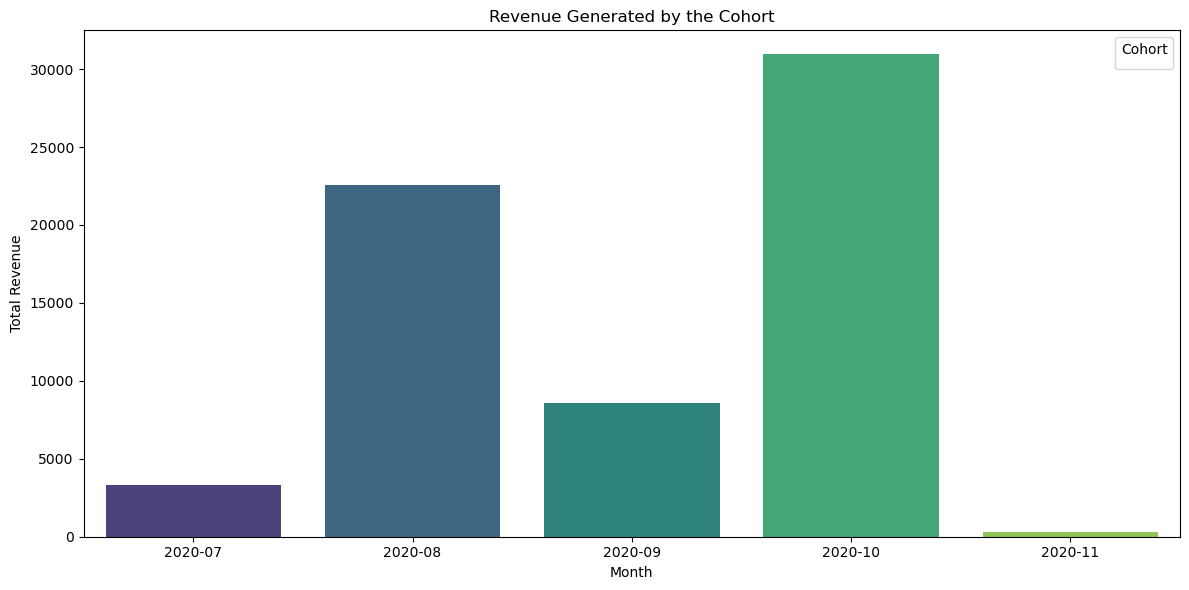

In [55]:
df_3_grouped = subset_merged_3_df.groupby('cohort')['total_amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=df_3_grouped.index, y=df_3_grouped.values, palette='viridis')

plt.title('Revenue Generated by the Cohort')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Cohort')
plt.tight_layout()
plt.show()


Insights 
Revenue directly proportional to the no. of users in cohort. 

Maximum revenue in October, least in November.